In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np

In [2]:
fname = "lbrprices_transformed.csv"
prices = pd.read_csv(fname, index_col="Fecha_hora")
prices.head(5)

P    Ph-24    Ph-25    Ph-26    Ph-27    Ph-28  \
Fecha_hora                                                                  
2016-08-09 00:00:00  95.3264  54.8461  45.1982  44.7123  46.2995  42.9422   
2016-08-09 01:00:00  82.8532  52.2179  54.8461  45.1982  44.7123  46.2995   
2016-08-09 02:00:00  57.9764  61.9198  52.2179  54.8461  45.1982  44.7123   
2016-08-09 03:00:00  67.6407  36.8105  61.9198  52.2179  54.8461  45.1982   
2016-08-09 04:00:00  66.4892  34.8274  36.8105  61.9198  52.2179  54.8461   

                       Ph-29    Ph-30    Ph-31    Ph-32    ...      month_Dec  \
Fecha_hora                                                 ...                  
2016-08-09 00:00:00  44.3551  46.3440  45.6826  42.6676    ...              0   
2016-08-09 01:00:00  42.9422  44.3551  46.3440  45.6826    ...              0   
2016-08-09 02:00:00  46.2995  42.9422  44.3551  46.3440    ...              0   
2016-08-09 03:00:00  44.7123  46.2995  42.9422  44.3551    ...              0   
2016-08-09 04:00:00  45.1982  44.7123  46.2995  42.9422    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
Fecha_hora                                                                   
2016-08-09 00:00:00          0          0          0          0          0   
2016-08-09 01:00:00          0          0          0          0          0   
2016-08-09 02:00:00          0          0          0          0          0   
2016-08-09 03:00:00          0          0          0          0          0   
2016-08-09 04:00:00          0          0          0          0          0   

                     month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                       
2016-08-09 00:00:00          0          0          0          0  
2016-08-09 01:00:00          0          0          0          0  
2016-08-09 02:00:00          0          0          0          0  
2016-08-09 03:00:00          0          0          0          0  
2016-08-09 04:00:00          0          0          0          0  

[5 rows x 70 columns]

In [3]:
prices.describe(include=['object', 'int', 'float'])

P         Ph-24         Ph-25         Ph-26         Ph-27  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.093873     72.053371     72.051262     72.048388     72.043583   
std       34.183615     34.176714     34.177036     34.176854     34.173544   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.164400     48.156475     48.154175     48.152250     48.147300   
50%       65.084300     65.010100     65.008500     65.007250     65.002250   
75%       88.620925     88.541800     88.541800     88.531450     88.526450   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

              Ph-28         Ph-29         Ph-30         Ph-31         Ph-32  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean      72.039969     72.035831     72.032904     72.029738     72.025476   
std       34.172700     34.170911     34.170539     34.169971     34.168179   
min       18.704900     18.704900     18.704900     18.704900     18.704900   
25%       48.145375     48.140500     48.134600     48.132500     48.130500   
50%       64.996600     64.995100     64.993600     64.989550     64.985950   
75%       88.521425     88.517825     88.516725     88.513675     88.496425   
max      329.440000    329.440000    329.440000    329.440000    329.440000   

           ...          month_Dec     month_Feb     month_Jan     month_Jul  \
count      ...       20520.000000  20520.000000  20520.000000  20520.000000   
mean       ...           0.085380      0.065497      0.072515      0.072515   
std        ...           0.279453      0.247407      0.259344      0.259344   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      0.000000      0.000000   
50%        ...           0.000000      0.000000      0.000000      0.000000   
75%        ...           0.000000      0.000000      0.000000      0.000000   
max        ...           1.000000      1.000000      1.000000      1.000000   

          month_Jun     month_Mar     month_May     month_Nov     month_Oct  \
count  20520.000000  20520.000000  20520.000000  20520.000000  20520.000000   
mean       0.070175      0.072515      0.072515      0.105263      0.108772   
std        0.255449      0.259344      0.259344      0.306900      0.311360   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          month_Sep  
count  20520.000000  
mean       0.105263  
std        0.306900  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 70 columns]

### Choosing features and targe

In [4]:
X = prices.drop(["P"], axis=1)
y = prices["P"]

In [5]:
y.head(5)

Fecha_hora
2016-08-09 00:00:00    95.3264
2016-08-09 01:00:00    82.8532
2016-08-09 02:00:00    57.9764
2016-08-09 03:00:00    67.6407
2016-08-09 04:00:00    66.4892
Name: P, dtype: float64

In [6]:
X.head(5)

Ph-24    Ph-25    Ph-26    Ph-27    Ph-28    Ph-29  \
Fecha_hora                                                                  
2016-08-09 00:00:00  54.8461  45.1982  44.7123  46.2995  42.9422  44.3551   
2016-08-09 01:00:00  52.2179  54.8461  45.1982  44.7123  46.2995  42.9422   
2016-08-09 02:00:00  61.9198  52.2179  54.8461  45.1982  44.7123  46.2995   
2016-08-09 03:00:00  36.8105  61.9198  52.2179  54.8461  45.1982  44.7123   
2016-08-09 04:00:00  34.8274  36.8105  61.9198  52.2179  54.8461  45.1982   

                       Ph-30    Ph-31    Ph-32    Ph-33    ...      month_Dec  \
Fecha_hora                                                 ...                  
2016-08-09 00:00:00  46.3440  45.6826  42.6676  39.0872    ...              0   
2016-08-09 01:00:00  44.3551  46.3440  45.6826  42.6676    ...              0   
2016-08-09 02:00:00  42.9422  44.3551  46.3440  45.6826    ...              0   
2016-08-09 03:00:00  46.2995  42.9422  44.3551  46.3440    ...              0   
2016-08-09 04:00:00  44.7123  46.2995  42.9422  44.3551    ...              0   

                     month_Feb  month_Jan  month_Jul  month_Jun  month_Mar  \
Fecha_hora                                                                   
2016-08-09 00:00:00          0          0          0          0          0   
2016-08-09 01:00:00          0          0          0          0          0   
2016-08-09 02:00:00          0          0          0          0          0   
2016-08-09 03:00:00          0          0          0          0          0   
2016-08-09 04:00:00          0          0          0          0          0   

                     month_May  month_Nov  month_Oct  month_Sep  
Fecha_hora                                                       
2016-08-09 00:00:00          0          0          0          0  
2016-08-09 01:00:00          0          0          0          0  
2016-08-09 02:00:00          0          0          0          0  
2016-08-09 03:00:00          0          0          0          0  
2016-08-09 04:00:00          0          0          0          0  

[5 rows x 69 columns]

### Train/test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)
print("Training features/target: ", X_train.shape, y_train.shape)
print("Testing freatures/targe: ", X_test.shape, y_test.shape)

Training features/target:  (15390, 69) (15390,)
Testing freatures/targe:  (5130, 69) (5130,)


### Scalaling Features

In [8]:
y_train = y_train.values.reshape(-1 ,1)
y_test = y_test.values.reshape(-1 , 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
y_train_sc = sc_y.fit_transform(y_train)

In [10]:
y_train_sc

array([[-0.32091766],
       [ 0.3488435 ],
       [-0.5951777 ],
       ..., 
       [-0.76017387],
       [-1.2435408 ],
       [-0.22298388]])

In [11]:
X_train_sc

array([[-0.29857336, -0.24846105, -0.05925363, ..., -0.34618323,
         2.86052051, -0.34665381],
       [ 0.20016046, -0.24156467, -0.1753998 , ..., -0.34618323,
        -0.34958673,  2.88472239],
       [-0.96373   , -0.98616114, -1.22141754, ..., -0.34618323,
        -0.34958673, -0.34665381],
       ..., 
       [-1.1567646 , -1.26993086, -1.23410382, ..., -0.34618323,
        -0.34958673, -0.34665381],
       [-1.14237473, -1.08174836, -1.00116755, ..., -0.34618323,
        -0.34958673, -0.34665381],
       [-0.76499498, -0.69582259, -0.66784826, ..., -0.34618323,
        -0.34958673, -0.34665381]])

 ### Model 1: Support Vector Regression (RBF kernel)


In [12]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel="rbf")

In [13]:
svr_rbf.fit(X_train_sc, y_train_sc.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


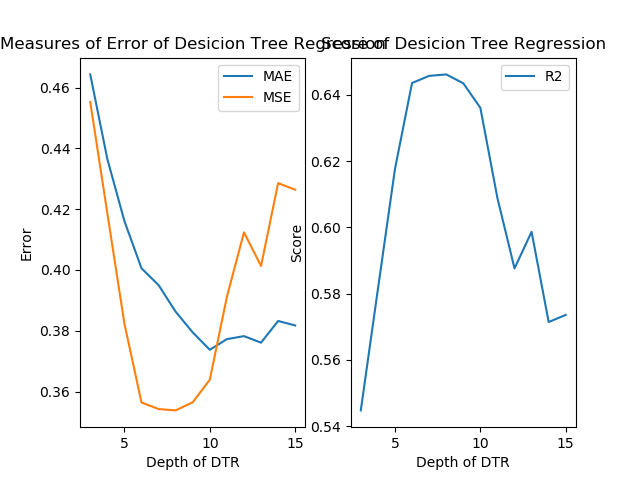

In [14]:
import matplotlib.pyplot as plt
plt.plot(y_train_sc[100:200], 'o')
plt.plot(svr_rbf.predict(X_train_sc)[100:200])
plt.show()

In [15]:
svr_rbf.score(X_train_sc, y_train_sc)

0.79333053606552029

In [16]:
svr_rbf.score(sc_X.transform(X_test), sc_y.transform(y_test))

0.74535729550887031

### Model 2: Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_5 = DecisionTreeRegressor(max_depth=5)

In [18]:
dtr_3.fit(X_train_sc, y_train_sc)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
dtr_5.fit(X_train_sc, y_train_sc)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
plt.plot(y_train_sc[100:200], 'o')
plt.plot(dtr_3.predict(X_train_sc)[100:200])
plt.plot(dtr_5.predict(X_train_sc)[100:200])
plt.show()

In [21]:
print("Score DecisionTree Max Depth 3 = {}".format(dtr_3.score(X_train_sc, y_train_sc)))
print("Score DecisionTree Max Depth 5 = {}".format(dtr_5.score(X_train_sc, y_train_sc)))

Score DecisionTree Max Depth 3 = 0.5376101221873852
Score DecisionTree Max Depth 5 = 0.6207144339050665


In [22]:
for i in range(3,16):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train_sc, y_train_sc)
    score = dtr.score(X_train_sc, y_train_sc)
    print("Score DecisionTree Max Depth {} = {}".format(i, score))

Score DecisionTree Max Depth 3 = 0.5376101221873852
Score DecisionTree Max Depth 4 = 0.5819830984172563
Score DecisionTree Max Depth 5 = 0.6207144339050666
Score DecisionTree Max Depth 6 = 0.6575493411331992
Score DecisionTree Max Depth 7 = 0.7000976157071859
Score DecisionTree Max Depth 8 = 0.7417891947007296
Score DecisionTree Max Depth 9 = 0.7796139190709784
Score DecisionTree Max Depth 10 = 0.8186019954806971
Score DecisionTree Max Depth 11 = 0.8517407894880966
Score DecisionTree Max Depth 12 = 0.8787615265641765
Score DecisionTree Max Depth 13 = 0.8998302957524632
Score DecisionTree Max Depth 14 = 0.9189711133427799
Score DecisionTree Max Depth 15 = 0.9351217066483523


In [23]:
plt.plot(y_train_sc[100:200], 'o')
plt.plot(dtr.predict(X_train_sc)[100:200])

In [24]:
dtr

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
X_test_sc = sc_X.fit_transform(X_test)
y_test_sc = sc_y.fit_transform(y_test)

In [26]:
dtr.score(X_test_sc, y_test_sc)

0.57366271934918389

In [27]:
plt.plot(y_test_sc[100:200], 'o')
plt.plot(dtr.predict(X_test_sc)[100:200])

In [28]:
for i in range(3,16):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train_sc, y_train_sc)
    score = dtr.score(X_test_sc, y_test_sc)
    print("Score DecisionTree Max Depth {} = {}".format(i, score))

Score DecisionTree Max Depth 3 = 0.5447757679348099
Score DecisionTree Max Depth 4 = 0.5813165176417705
Score DecisionTree Max Depth 5 = 0.6171162590982225
Score DecisionTree Max Depth 6 = 0.643591419255576
Score DecisionTree Max Depth 7 = 0.6422122515157203
Score DecisionTree Max Depth 8 = 0.6484980101141073
Score DecisionTree Max Depth 9 = 0.6470638521651217
Score DecisionTree Max Depth 10 = 0.6310172561486501
Score DecisionTree Max Depth 11 = 0.6156436911621083
Score DecisionTree Max Depth 12 = 0.6071403399425567
Score DecisionTree Max Depth 13 = 0.5894385136384006
Score DecisionTree Max Depth 14 = 0.56994330649203
Score DecisionTree Max Depth 15 = 0.5683570869168504


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
list_mae = []
list_score = []
list_mse = []
for i in range(3,16):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train_sc, y_train_sc)
    y_pred_sc = dtr.predict(X_test_sc)
    score = dtr.score(X_test_sc, y_test_sc)
    list_score.append(score)
    mae = mean_absolute_error(y_test_sc, y_pred_sc)
    list_mae.append(mae)
    mse = mean_squared_error(y_test_sc, y_pred_sc)
    list_mse.append(mse)
    print("----- DesicionTree Max Dept {} ---- ".format(i))
    print("R2  = {}".format(score))
    print("MAE = {}".format(mae))
    print("MSE = {}".format(mse))
    
plt.subplot(1,2,1)
plt.plot(range(3,16),np.array(list_mae).ravel())
plt.plot(range(3,16),np.array(list_mse).ravel())
plt.legend(["MAE", 'MSE'])
plt.xlabel('Depth of DTR')
plt.ylabel('Error')
plt.title('Measures of Error of Desicion Tree Regression')

plt.subplot(1,2,2)
plt.plot(range(3,16),np.array(list_score).ravel())
plt.legend(['R2'])
plt.xlabel('Depth of DTR')
plt.ylabel('Score')
plt.title('Score of Desicion Tree Regression')

plt.show()

----- DesicionTree Max Dept 3 ---- 
R2  = 0.5447757679348099
MAE = 0.46431256163839746
MSE = 0.45522423206519014
----- DesicionTree Max Dept 4 ---- 
R2  = 0.5813165176417705
MAE = 0.4365033046266089
MSE = 0.41868348235822944
----- DesicionTree Max Dept 5 ---- 
R2  = 0.6176244143154237
MAE = 0.41608267197173326
MSE = 0.38237558568457636
----- DesicionTree Max Dept 6 ---- 
R2  = 0.6435914192555758
MAE = 0.4005472697824797
MSE = 0.3564085807444241
----- DesicionTree Max Dept 7 ---- 
R2  = 0.6457514607301709
MAE = 0.3950170171596062
MSE = 0.3542485392698291
----- DesicionTree Max Dept 8 ---- 
R2  = 0.6461945241243234
MAE = 0.3862635255136792
MSE = 0.3538054758756766
----- DesicionTree Max Dept 9 ---- 
R2  = 0.6435205487013227
MAE = 0.3794593900258981
MSE = 0.35647945129867736
----- DesicionTree Max Dept 10 ---- 
R2  = 0.6361163762596282
MAE = 0.3737453081612358
MSE = 0.3638836237403718
----- DesicionTree Max Dept 11 ---- 
R2  = 0.6088499121714971
MAE = 0.377242411769197
MSE = 0.39115008782

### Model Selection based on Errors and Score
#### Descicion Tree Max Depth 8

In [30]:
lbrprice_regressor = DecisionTreeRegressor(max_depth=8)
lbrprice_regressor.fit(X_train_sc, y_train_sc)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Dump model to file

In [31]:
import pickle

#serializing our model to a file called model.pkl
pickle.dump(lbrprice_regressor, open("lbrprice_model.pkl","wb"))

### Cross-Validation and Hyper-parameters

In [32]:
# Import Pipeline and GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
pipe = Pipeline([
    ('standarscaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(max_depth=8))
])

In [35]:
hyperparameters = {'regressor__max_depth': range(3,16)}

rgs = GridSearchCV(pipe, hyperparameters, cv=5)
rgs.fit(X_train, y_train)
res.score(X_test, y_test)

NameError: name 'res' is not defined

In [36]:
rgs.score(X_test, y_test)

0.6569717752833425

In [37]:
rgs.best_params_

{'regressor__max_depth': 8}

In [38]:
y_pred = rgs.predict(X_test)

<IPython.core.display.Javascript object>


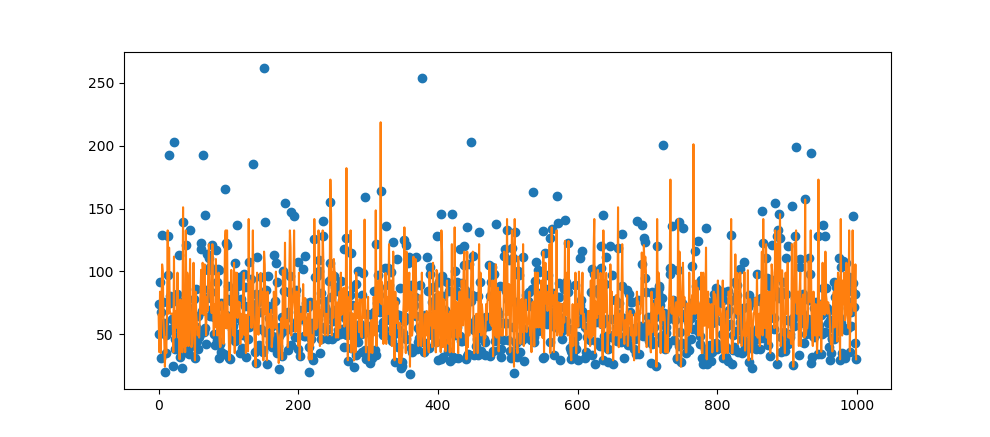

In [41]:
plt.plot(y_test[2000:3000], 'o')
plt.plot(y_pred[2000:3000])
plt.show()

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(np.sqrt(mse)))

MAE: 12.83728994311115
MSE: 392.0666160845265
RMSE: 19.800672111939193


### Pipeline Dump for future use in API

In [44]:
pickle.dump(rgs, open("lbrprice_model_rgs.pkl","wb"))